# Introduction

In the heat of a Formula E race, teams need fast access to insights that can help drivers make split-second decisions and cross the finish line first. Can your data-science skills help Envision Racing, one of the founding teams in the championship, take home even more trophies?

To do so, you will have to build a machine learning model that predicts the Envision Racing drivers’ lap times for the all-important qualifying sessions that determine what position they start the race in. Winning races involves a combination of both a driver’s skills and data analytics. To help the team you’ll need to consider several factors that affect performance during a session, including weather, track conditions, and a driver’s familiarity with the track.

Genpact, a leading professional services firm that focuses on digital transformation, is collaborating with Envision Racing, a Formula E racing team and digital hackathon platform MachineHack, a brainchild of Analytics India Magazine, is launching ‘Dare in Reality’.’ This two-week hackathon allows data science professionals, machine learning engineers, artificial intelligence practitioners, and other tech enthusiasts to showcase their skills, impress the judges, and stand a chance to win exciting cash prizes.

Genpact (NYSE: G) is a global professional services firm that makes business transformation real, driving digital-led innovation and digitally enabled intelligent operations for our clients.

| Feature | Description Provided |
|---|---|
| NUMBER | Number in sequence |
| DRIVER_NUMBER | Driver number |
| LAP_NUMBER | Lap number |
| LAP_TIME | Lap time in seconds |
| LAP_IMPROVEMENT | Number of Lap Improvement |
| CROSSING_FINISH_LINE_IN_PIT | Time |
| S1 | Sector 1 in [min sec.microseconds] |
| S1_IMPROVEMENT | Improvement in sector 1 |
| S2 | Sector 2 in [min sec.microseconds] |
| S2_IMPROVEMENT | Improvement in sector 2 |
| S3 | Sector 3 in [min sec.microseconds] |
| S3_IMPROVEMENT | Improvement in sector 3 |
| KPH | Speed in kilometer/hour |
| ELAPSED | Time elapsed in [min sec.microseconds] |
| HOUR | In [min sec.microseconds] |
| S1_LARGE | In [min sec.microseconds] |
| S2_LARGE | In [min sec.microseconds] |
| S3_LARGE | In [min sec.microseconds] |
| DRIVER_NAME | Name of the driver |
| PIT_TIME | Time taken to car stops in the pits for fuel and other consumables to be renewed or replenished |
| GROUP | Group of driver |
| TEAM | Team name |
| POWER | Brake Horsepower(bhp) |
| LOCATION | Location of the event |
| EVENT | Free practice or qualifying |

- train.csv - 10276 rows x 25 columns (Includes target column as LAP_TIME).
- test.csv - 420 rows x 25 columns(Includes target column as LAP_TIME).
- (submission.csv) Please check the Evaluation section for more details on how to generate a valid submission.
- The challenge is to predict the LAP_TIME for the qualifying groups of location 6, 7 and 8.

**The submission will be evaluated using the RMSLE metric.\
One can use numpy.sqrt(mean_squared_log_error(actual, predicted)) to calculate the same**

# Importing packages and data, basic cleaning & overview of data

## Importing packages

**Downloading ML Helper :**

In [ ]:
# Downloading a package from github : https://github.com/karthikchiru12/ML_Helper
! git clone https://github.com/karthikchiru12/ML_Helper.git

**Importing packages :**

In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV

In [4]:
import xgboost as xgb

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras import Model,Sequential
from tensorflow.keras import backend as K

In [6]:
from pycaret.regression import *

In [7]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from ML_Helper.Analysis.eda import EDA
from ML_Helper.Encoding.featurize import Featurizer

In [ ]:
from Spaghetti import utils

In [ ]:
# Run this cell to view code for EDA function
?? EDA

In [ ]:
# Run this cell to view code for Featurizer function
?? Featurizer

In [ ]:
# Run this cell to view code for utils functions inside the folder
?? utils

## Importing data

**Files under Data folder :**

In [ ]:
os.listdir('Data/')

['test.csv',
 'train.csv',
 'train_weather.csv',
 'test_weather.csv',
 'Data_DIR_2021.zip',
 'submission.csv']

**Importing each file :**

In [ ]:
if not os.path.isfile('Cleaned_data/cleaned_train.csv'):
    train_data = pd.read_csv('Data/train.csv')
else:
    cleaned_train_data = pd.read_csv('Cleaned_data/cleaned_train.csv')

In [ ]:
if not os.path.isfile('Cleaned_data/cleaned_test.csv'):
    test_data = pd.read_csv('Data/test.csv')
    #test_data['LAP_TIME'] = 0
else:
    cleaned_test_data = pd.read_csv('Cleaned_data/cleaned_test.csv')

In [ ]:
if not os.path.isfile('Cleaned_data/cleaned_train_weather.csv'):
    train_weather_data = pd.read_csv('Data/train_weather.csv')
else:
    cleaned_train_weather_data = pd.read_csv('Cleaned_data/cleaned_train_weather.csv')

In [ ]:
if not os.path.isfile('Cleaned_data/cleaned_test_weather.csv'):
    test_weather_data = pd.read_csv('Data/test_weather.csv')
else:
    cleaned_test_weather_data = pd.read_csv('Cleaned_data/cleaned_test_weather.csv')

In [ ]:
sample_submission = pd.read_csv('Data/submission.csv')

**Spending that 70% of time cleaning this data :**

In [ ]:
if not os.path.isfile('Cleaned_data/'):
    path = os.getcwd()
    # Creating a new directory 'data'
    os.mkdir(path+'/Cleaned_data')
    print("train")
    utils.clean_data(train_data,'cleaned_train.csv')
    print("test")
    utils.clean_data(test_data,'cleaned_test.csv')
    print("train_weather")
    utils.clean_weather_data(train_weather_data,'cleaned_train_weather.csv')
    print("test_weather")
    utils.clean_weather_data(test_weather_data,'cleaned_test_weather.csv')

In [ ]:
# To startover the data cleaning, delete the Cleaned_data directory and rerun above cells
!rm -r Cleaned_data

In [ ]:
os.listdir('Cleaned_data/')

['cleaned_train_weather.csv',
 'cleaned_train.csv',
 'cleaned_test.csv',
 'cleaned_test_weather.csv']

## High level overview of data

### Train data : At glance

In [ ]:
cleaned_train_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Columns: 43 entries, NUMBER to PIT_TIME Large seconds
dtypes: float64(12), int64(17), object(14)
memory usage: 3.4+ MB


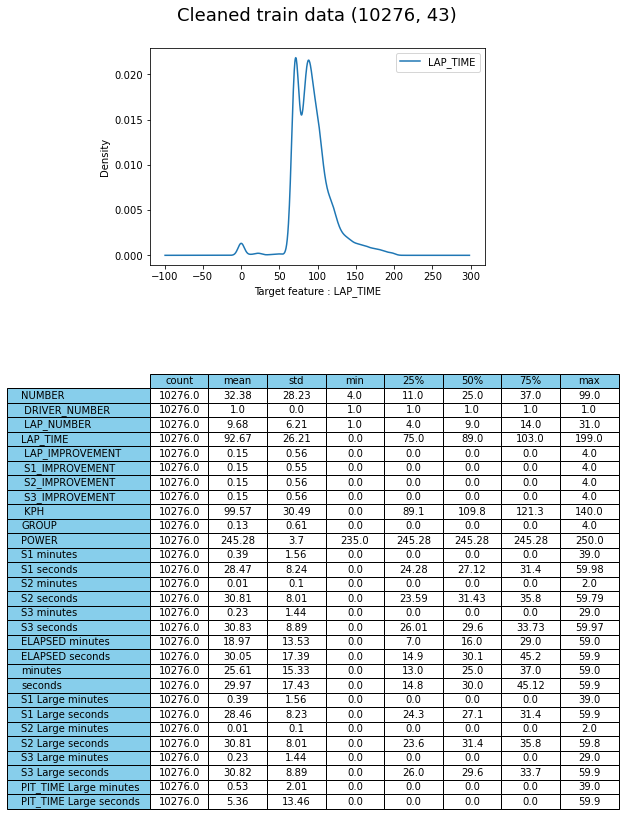

In [ ]:
utils.plot_dataset_description_with_target_distribution(cleaned_train_data,"LAP_TIME",
                                                        title="Cleaned train data")  

In [ ]:
utils.plot_missing_values_per_feature(cleaned_train_data,title="Cleaned train data")

### Test data : At glance

In [ ]:
cleaned_test_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Columns: 43 entries, NUMBER to PIT_TIME Large seconds
dtypes: float64(13), int64(16), object(14)
memory usage: 141.2+ KB


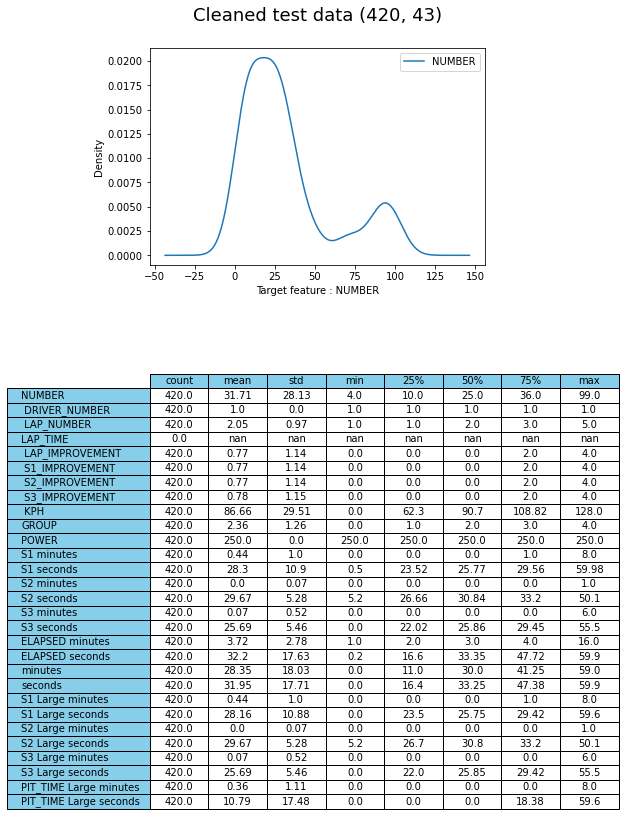

In [ ]:
utils.plot_dataset_description_with_target_distribution(cleaned_test_data,"NUMBER",
                                                  title="Cleaned test data")  

In [ ]:
utils.plot_missing_values_per_feature(cleaned_test_data,title="Cleaned test data")

### Train weather data : At glance

In [ ]:
cleaned_train_weather_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Columns: 11 entries, TIME_UTC_SECONDS to EVENT
dtypes: float64(5), int64(3), object(3)
memory usage: 78.7+ KB


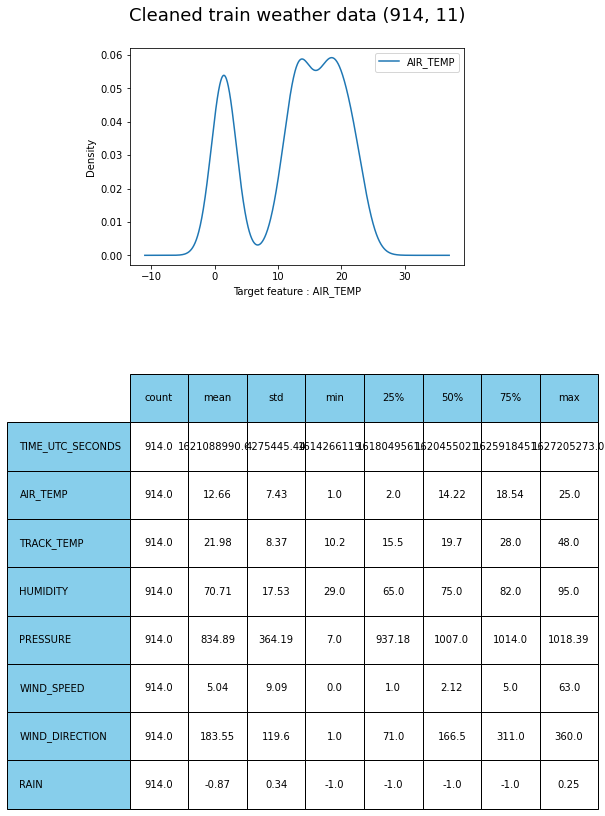

In [ ]:
utils.plot_dataset_description_with_target_distribution(cleaned_train_weather_data
                                                        ,"AIR_TEMP",title="Cleaned train weather data")  

### Test weather data : At glance

In [ ]:
cleaned_test_weather_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 11 entries, TIME_UTC_SECONDS to EVENTS
dtypes: int64(8), object(3)
memory usage: 14.5+ KB


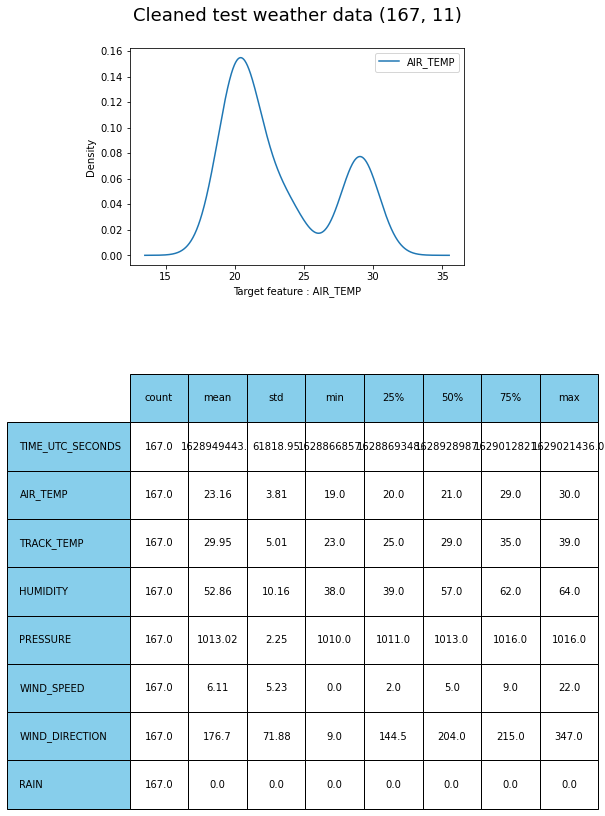

In [ ]:
utils.plot_dataset_description_with_target_distribution(cleaned_test_weather_data
                                                        ,"AIR_TEMP",title="Cleaned test weather data")  

# Exploratory data analysis

## Exploring the train data

**Initializng the object :**

In [ ]:
eda= EDA(cleaned_train_data)

### Univariate Analysis (Numerical Features)

**Plain distributions of numerical features :**

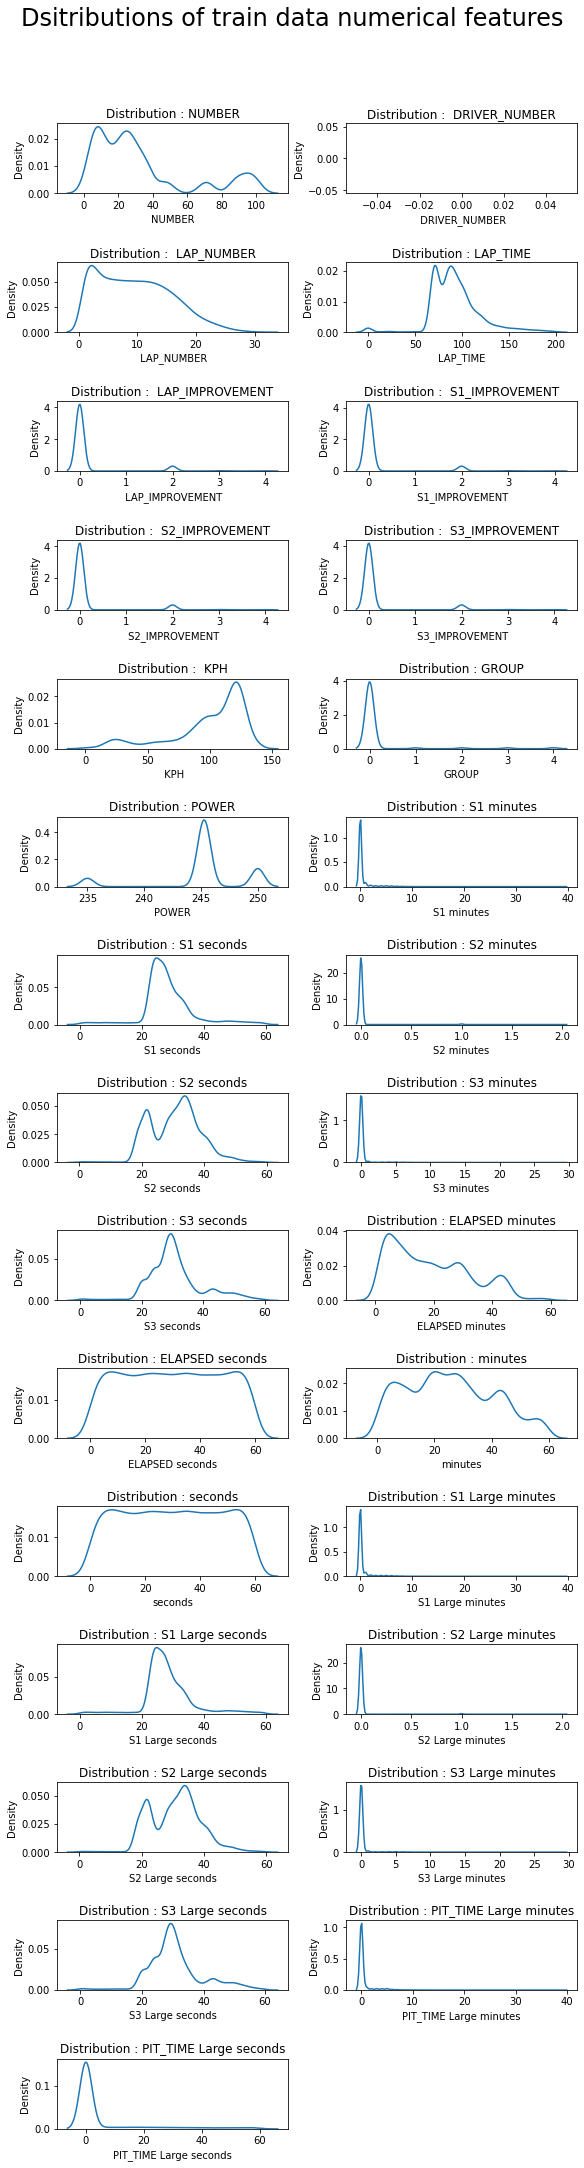

In [ ]:
eda.kde_plot(list(cleaned_train_data.describe().columns),width=8,height=30,
             title="Dsitributions of train data numerical features")

**Distributions of numerical features by event :**

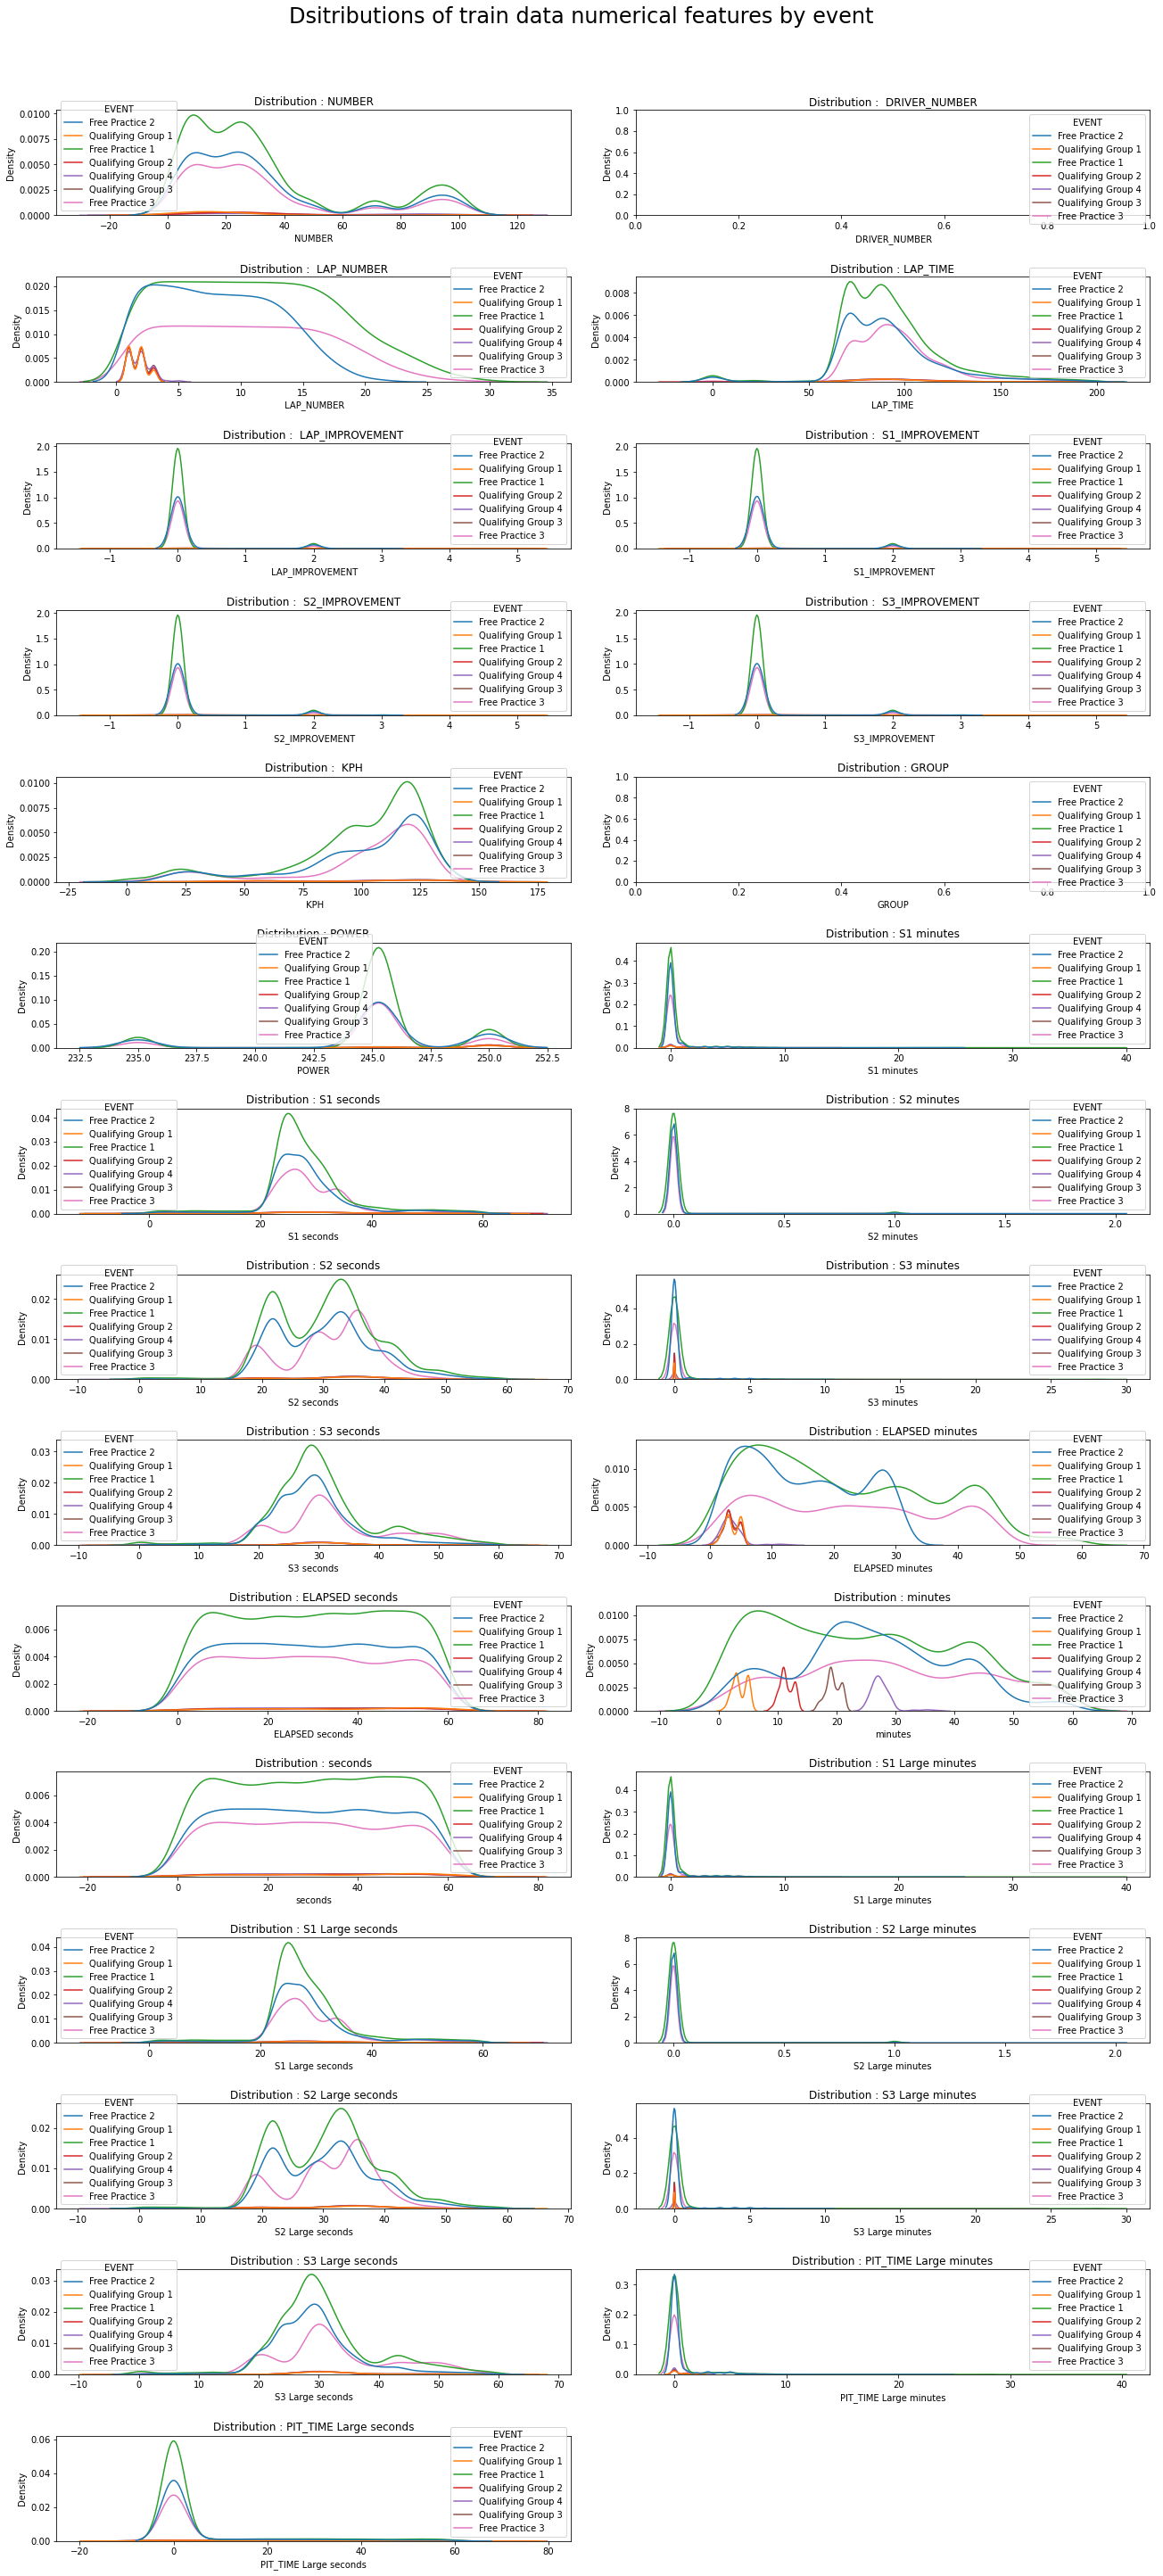

In [ ]:
eda.kde_plot(list(cleaned_train_data.describe().columns),width=18,height=40,hue="EVENT",
             title="Dsitributions of train data numerical features by event")

### Univariate Analysis (Categorical Features)

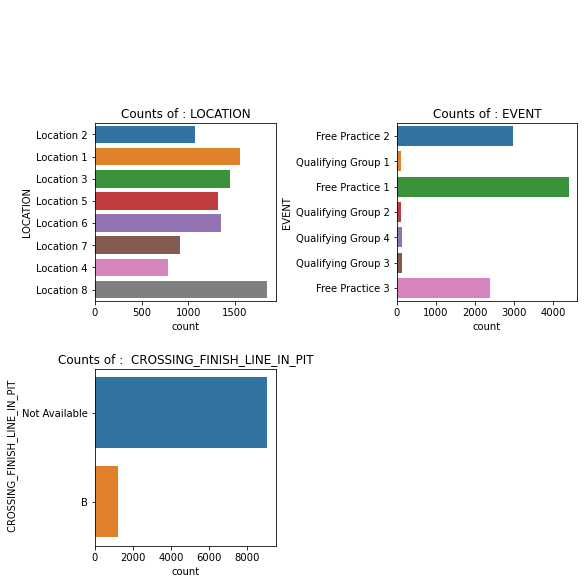

In [ ]:
eda.count_plot(['LOCATION','EVENT',' CROSSING_FINISH_LINE_IN_PIT'],width=8,height=8)

<AxesSubplot:xlabel='TEAM', ylabel='count'>

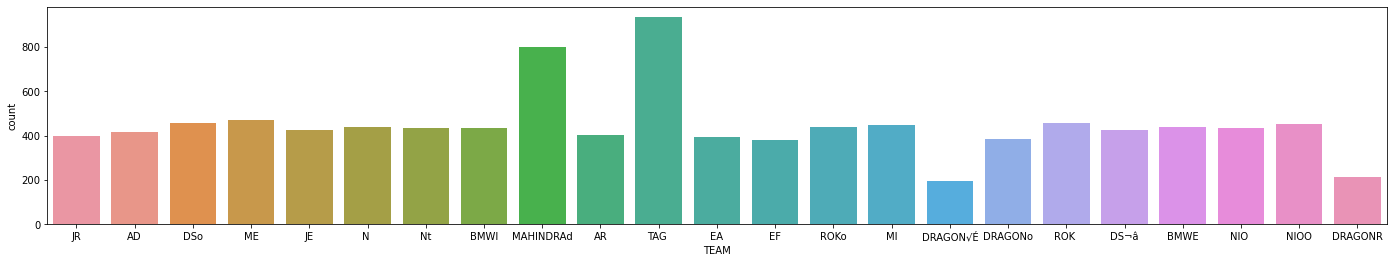

In [ ]:
plt.figure(figsize=(24,4))
sns.countplot(cleaned_train_data['TEAM'])

<AxesSubplot:xlabel='DRIVER_NAME', ylabel='count'>

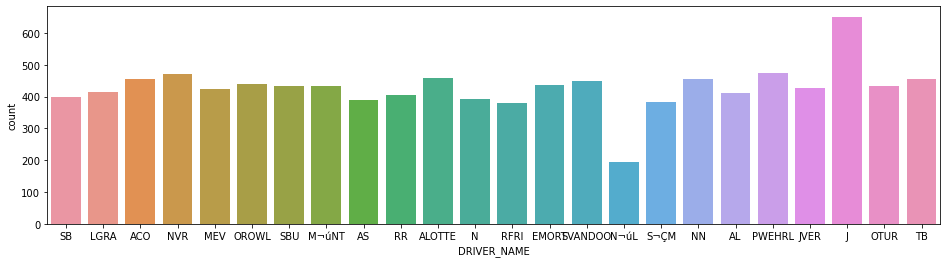

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(cleaned_train_data['DRIVER_NAME'])

### Correlation Between Features

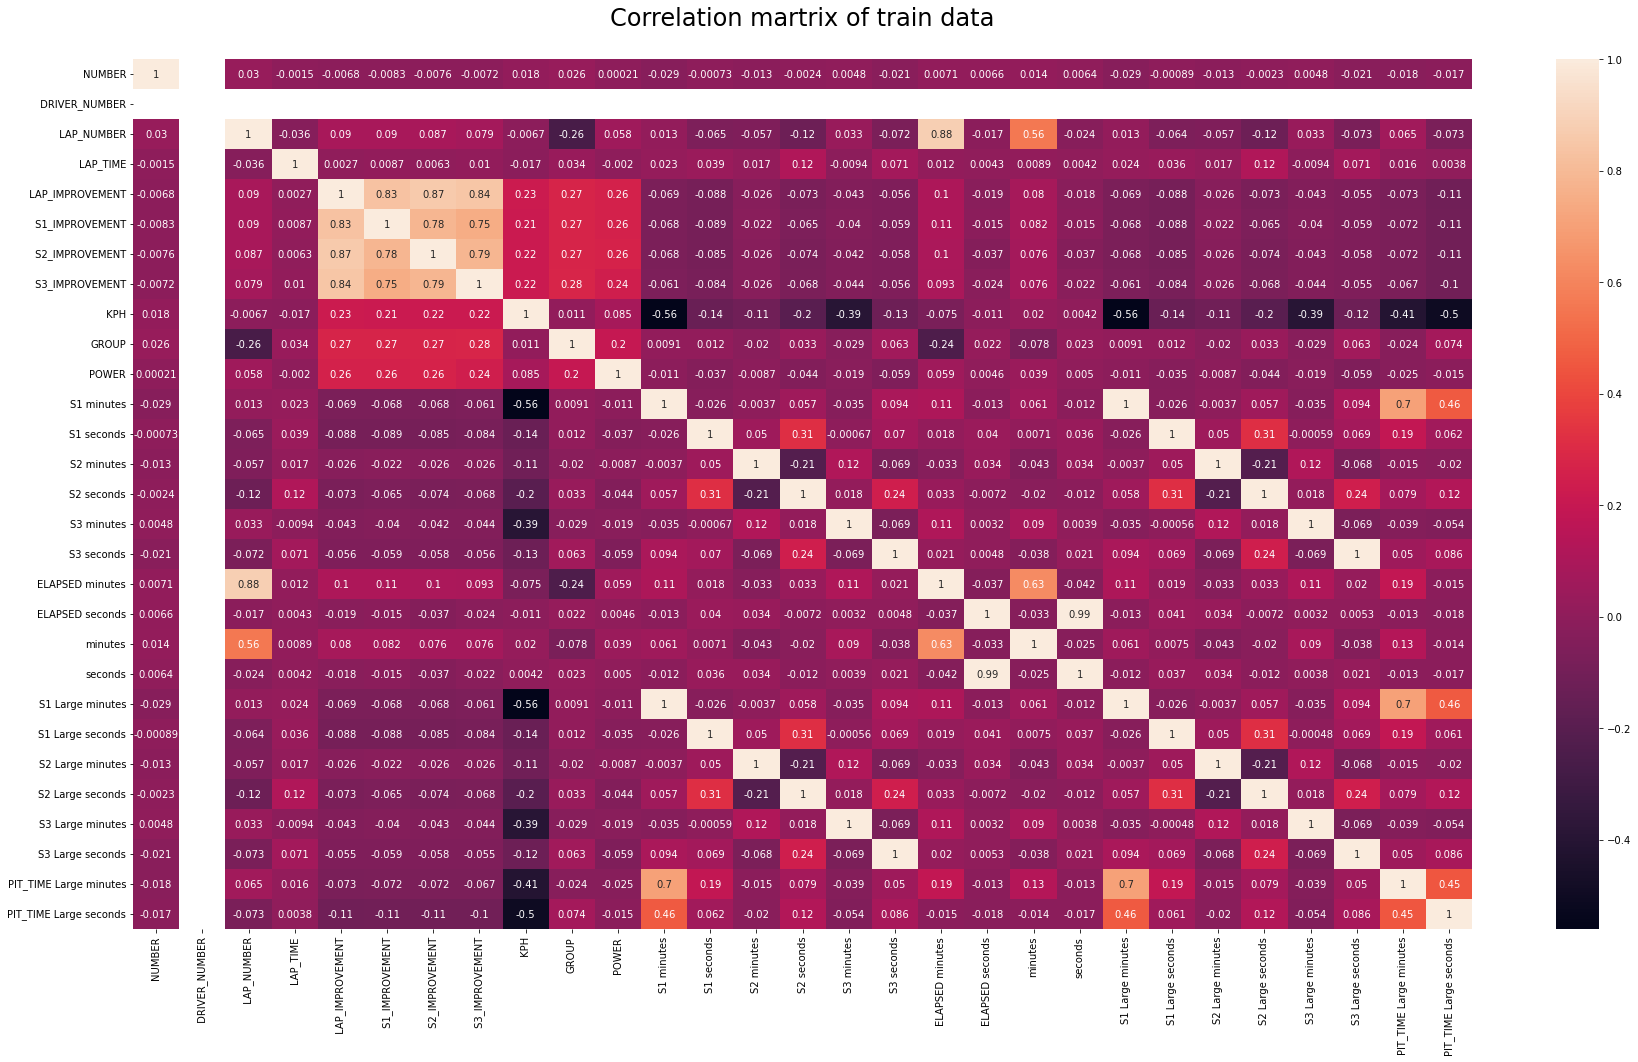

In [ ]:
eda.correlation_plot(list(cleaned_train_data.describe().columns),width=30,
                     title="Correlation martrix of train data")

## Exploring the train weather data

**Initializng the object :**

In [ ]:
eda = EDA(cleaned_train_weather_data)

### Univariate Analysis (Numerical Features)

**Plain distributions of numerical features :**

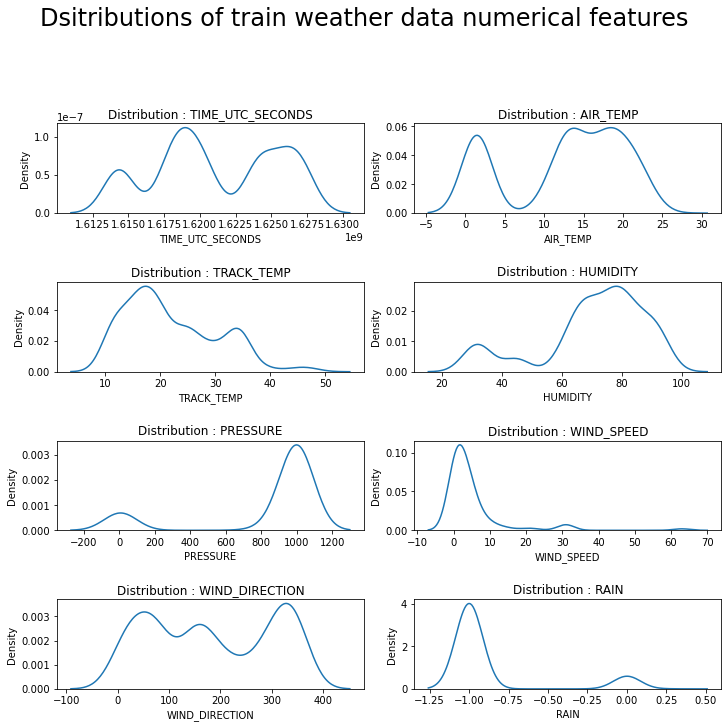

In [ ]:
eda.kde_plot(list(cleaned_test_weather_data.describe().columns),width=10,height=10,
             title="Dsitributions of train weather data numerical features")

**Distributions of numerical features by event :**

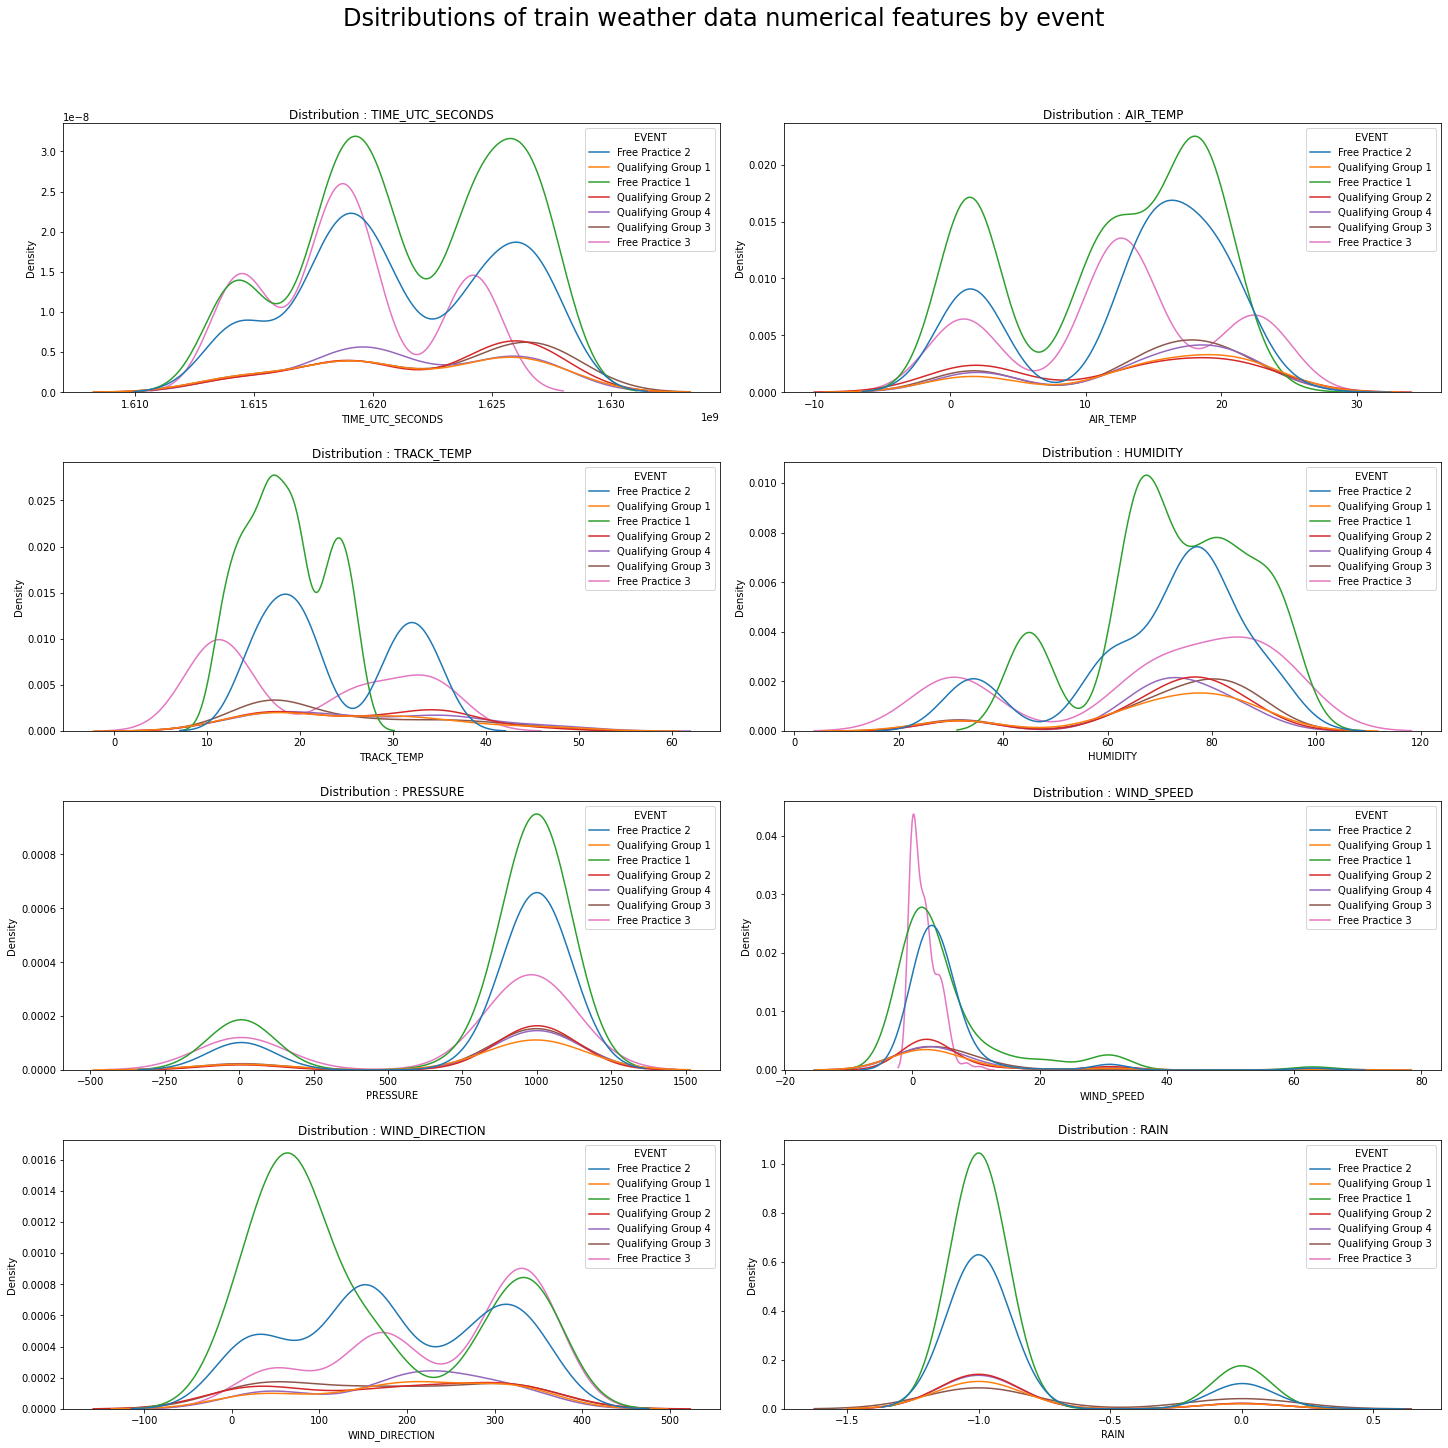

In [ ]:
eda.kde_plot(list(cleaned_test_weather_data.describe().columns),width=20,height=20,hue="EVENT",
             title="Dsitributions of train weather data numerical features by event")

### Univariate Analysis (Categorical Features)

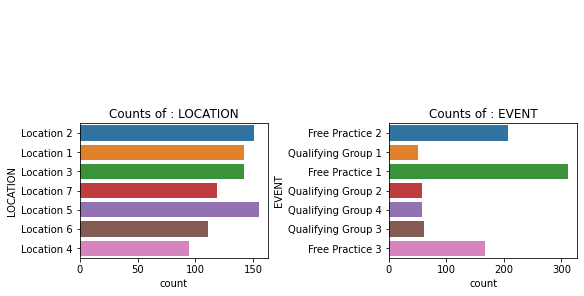

In [ ]:
eda.count_plot(['LOCATION','EVENT'],width=8,height=4)

# Preparing data for modelling

## Combining normal and weather data

**based on event (median) :**

In [ ]:
cleaned_train_weather_data.groupby(['EVENT']).median().reset_index().drop(['TIME_UTC_SECONDS','RAIN'],axis=1)

,EVENT,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION
0,Free Practice 1,13.0000,18.0,72.0,1011.000,2.00000,84.0
1,Free Practice 2,15.0556,20.9,76.0,1007.000,3.18280,160.0
2,Free Practice 3,12.6667,18.2,74.5,965.104,1.06093,293.0
3,Qualifying Group 1,15.1667,25.0,76.0,1006.000,2.12187,209.0
4,Qualifying Group 2,14.4722,27.4,76.0,1012.000,2.12187,191.5
5,Qualifying Group 3,18.0000,19.0,76.0,1008.000,3.18280,163.0
6,Qualifying Group 4,18.0000,26.1,72.0,1008.000,2.12187,218.0


In [ ]:
train_weather_data_median = \
cleaned_train_weather_data.groupby(['EVENT']).median().reset_index().drop(['TIME_UTC_SECONDS','RAIN'],axis=1)

In [ ]:
print("Before Merging :\n")
print("train data          :", cleaned_train_data.shape)
print("train weather data  :", train_weather_data_median.shape)

Before Merging :

train data          : (10276, 43)
train weather data  : (7, 7)


In [ ]:
train_data_combined = pd.merge(cleaned_train_data,train_weather_data_median,on=['EVENT'])

In [ ]:
print("After Merging :\n")
print("train data          :", train_data_combined.shape)

After Merging :

train data          : (10276, 49)


## Dropping unnecessary columns

In [ ]:
train_data_combined = train_data_combined.drop(['NUMBER',' S1',' S2',' S3',
                                                ' ELAPSED',' HOUR','S1_LARGE','S2_LARGE','S3_LARGE',
                                                'PIT_TIME','LOCATION'],axis=1)

In [ ]:
train_data_combined.shape

(10276, 38)

## Dividing the data into X and Y

In [ ]:
x = train_data_combined.drop(['LAP_TIME'],axis=1)
y = train_data_combined['LAP_TIME']

## Dividing X,Y into train ,CV sets

In [ ]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("Item    : Shape")
print("########################")
print("x_train : {0}".format(x_train.shape))
print(".........................")
print("y_train : {0}".format(y_train.shape))
print(".........................")
print("x_cv    : {0}".format(x_cv.shape))
print(".........................")
print("y_cv    : {0}".format(y_cv.shape))

Item    : Shape
########################
x_train : (8220, 37)
.........................
y_train : (8220,)
.........................
x_cv    : (2056, 37)
.........................
y_cv    : (2056,)


## Preparing the test set

In [ ]:
cleaned_test_data['EVENT'].value_counts()

Qualifying Group 2    113
Qualifying Group 3    110
Qualifying Group 4     99
Qualifying Group 1     98
Name: EVENT, dtype: int64

In [ ]:
cleaned_test_weather_data['EVENTS'].value_counts()

Free Practice 1       75
Free Practice 2       60
Qualifying Group 1     8
Qualifying Group 2     8
Qualifying Group 4     8
Qualifying Group 3     8
Name: EVENTS, dtype: int64

`Free Practice events in test data is not available`

In [ ]:
test_weather_data_median = cleaned_test_weather_data[(cleaned_test_weather_data['EVENTS']!='Free Practice 1') &
(cleaned_test_weather_data['EVENTS']!='Free Practice 2') & 
(cleaned_test_weather_data['EVENTS']!='Free Practice 3')].groupby(['EVENTS']).median()\
.reset_index().drop(['TIME_UTC_SECONDS','RAIN'],axis=1)

In [ ]:
test_weather_data_median = test_weather_data_median.rename(columns={'EVENTS':'EVENT'})

In [ ]:
test_weather_data_median

,EVENT,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION
0,Qualifying Group 1,23.0,33.5,50.5,1013.0,4.0,202.0
1,Qualifying Group 2,23.0,33.5,49.0,1013.0,6.0,210.5
2,Qualifying Group 3,23.5,34.0,48.5,1013.0,5.5,214.5
3,Qualifying Group 4,23.5,33.5,48.5,1013.0,8.0,205.5


`Combining test normal and weather data`

In [ ]:
test_data_combined = pd.merge(cleaned_test_data,test_weather_data_median)

In [ ]:
test_data_combined = test_data_combined.drop(['NUMBER',' S1',' S2',' S3',
                                                ' ELAPSED',' HOUR','S1_LARGE','S2_LARGE','S3_LARGE',
                                                'PIT_TIME','LOCATION','LAP_TIME'],axis=1)

In [ ]:
test_data_combined.shape

(420, 37)

# Featurization & Encoding

## Initializing object

In [ ]:
f1 = Featurizer(x_train = x_train, x_holdout = x_cv, x_test = test_data_combined)

## Transforming

In [ ]:
numerical =[' KPH','POWER','PRESSURE','HUMIDITY','AIR_TEMP','TRACK_TEMP','WIND_DIRECTION']
categorical = [' CROSSING_FINISH_LINE_IN_PIT','TEAM','EVENT','DRIVER_NAME']

In [ ]:
x_train_final,x_test_final,x_cv_final = f1.featurize(numerical,categorical)

`WELL my scipy.sparse.hstack() was not working, well still need a lot of work to do there.`<br>
`So manually stacking them below, For this i commented out 122 line in the featurize.py`

In [ ]:
x_train_final = np.hstack(x_train_final)
x_test_final = np.hstack(x_test_final)
x_cv_final = np.hstack(x_cv_final)

In [ ]:
print("Item    : Shape")
print("########################")
print("x_train : {0}".format(x_train_final.shape))
print(".........................")
print("y_train : {0}".format(y_train.shape))
print(".........................")
print("x_cv    : {0}".format(x_cv_final.shape))
print(".........................")
print("y_cv    : {0}".format(y_cv.shape))
print(".........................")
print("x_test  : {0}".format(x_test_final.shape))
print(".........................")

Item    : Shape
########################
x_train : (8220, 86)
.........................
y_train : (8220,)
.........................
x_cv    : (2056, 86)
.........................
y_cv    : (2056,)
.........................
x_test  : (420, 86)
.........................


In [ ]:
if not os.path.isfile('Final_data/'):
    os.mkdir('Final_data')
    
    temp = pd.DataFrame(x_train_final)
    temp['target'] = y_train.values
    temp.to_csv('Final_data/final_train.csv',index=False)
    
    temp = pd.DataFrame(x_cv_final)
    temp['target'] = y_cv.values
    temp.to_csv('Final_data/final_cv.csv',index=False)
    
    temp = pd.DataFrame(x_test_final)
    temp.to_csv('Final_data/final_test.csv',index=False)

In [8]:
final_train = pd.read_csv('Final_data/final_train.csv')
final_cv = pd.read_csv('Final_data/final_cv.csv')
final_test = pd.read_csv('Final_data/final_test.csv')

# Modelling

## RMSLE

In [9]:
def root_mean_squared_log_error(y_true, y_pred):
        return np.sqrt(mean_squared_log_error(y_true,y_pred))

## XGB - Config1

In [10]:
xgbr = xgb.XGBRegressor(n_jobs=-1,n_estimators=500,tree_method="gpu_hist",
                        predictor="gpu_predictor",seed=42)

In [11]:
evaluation = [( final_train.drop(['target'],axis=1), final_train['target']), 
                  ( final_cv.drop(['target'],axis=1), final_cv['target'])]

In [12]:
xgbr.fit(final_train.drop(['target'],axis=1), final_train['target'],
eval_set=evaluation, eval_metric="rmsle", 
early_stopping_rounds=20,
verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1,
             predictor='gpu_predictor', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [13]:
root_mean_squared_log_error(final_train['target'],xgbr.predict(final_train.drop(['target'],axis=1)))

0.5387854553775319

In [13]:
xgb_submission = pd.DataFrame({"LAP_TIME" :abs(xgbr.predict(final_test))})

In [14]:
xgb_submission.to_csv("xgbr1.csv",index=False)

## XGB - Config2

In [14]:
xgbr = xgb.XGBRegressor(n_jobs=-1,n_estimators=1000,tree_method="gpu_hist",
                        predictor="gpu_predictor",seed=42)

In [15]:
evaluation = [( final_train.drop(['target'],axis=1), np.log(final_train['target'] + 1).values.reshape(-1,1)), 
                  ( final_cv.drop(['target'],axis=1), np.log(final_cv['target'] + 1).values.reshape(-1,1))]

In [16]:
xgbr.fit(final_train.drop(['target'],axis=1), np.log(final_train['target'] + 1).values.reshape(-1,1),
eval_set=evaluation, eval_metric="rmsle",
early_stopping_rounds=30,)
#verbose=False)

[0]	validation_0-rmsle:0.72373	validation_1-rmsle:0.72518
[1]	validation_0-rmsle:0.46948	validation_1-rmsle:0.47175
[2]	validation_0-rmsle:0.33502	validation_1-rmsle:0.33935
[3]	validation_0-rmsle:0.26257	validation_1-rmsle:0.26880
[4]	validation_0-rmsle:0.22303	validation_1-rmsle:0.23242
[5]	validation_0-rmsle:0.20295	validation_1-rmsle:0.21471
[6]	validation_0-rmsle:0.19338	validation_1-rmsle:0.20657
[7]	validation_0-rmsle:0.18726	validation_1-rmsle:0.20317
[8]	validation_0-rmsle:0.18413	validation_1-rmsle:0.20149
[9]	validation_0-rmsle:0.18284	validation_1-rmsle:0.20088
[10]	validation_0-rmsle:0.18021	validation_1-rmsle:0.20109
[11]	validation_0-rmsle:0.17951	validation_1-rmsle:0.20121
[12]	validation_0-rmsle:0.17839	validation_1-rmsle:0.20129
[13]	validation_0-rmsle:0.17730	validation_1-rmsle:0.20166
[14]	validation_0-rmsle:0.17665	validation_1-rmsle:0.20174
[15]	validation_0-rmsle:0.17571	validation_1-rmsle:0.20195
[16]	validation_0-rmsle:0.17366	validation_1-rmsle:0.20220
[17]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
             predictor='gpu_predictor', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [17]:
root_mean_squared_log_error(final_train['target'],
                            np.exp(xgbr.predict(final_train.drop(['target'],axis=1)))-1)

0.5078847656878408

In [19]:
xgb_submission = pd.DataFrame({"LAP_TIME" :abs(xgbr.predict(final_test))})

In [20]:
xgb_submission.to_csv("xgbr2.csv",index=False)

## Neural network

In [18]:
# https://stackoverflow.com/questions/43855162/rmse-rmsle-loss-function-in-keras
def root_mean_squared_log_error_K(y_true, y_pred):
    return K.sqrt(K.mean(K.square(K.log(1+y_pred) - K.log(1+y_true))))

In [19]:
tf.random.set_seed(42)

In [20]:
tf.keras.backend.clear_session()

In [21]:
model = Sequential()

model.add(Dense(128, activation='relu',input_dim = final_train.drop(['target'],axis=1).shape[1]))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1,))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               11136     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [22]:
model.compile(
    loss = 'mae', 
    optimizer="adam", 
    metrics=['mse',root_mean_squared_log_error_K])

In [23]:
history = model.fit(
    x = final_train.drop(['target'],axis=1),
    y = final_train['target'], batch_size = 16,
    validation_data = (final_cv.drop(['target'],axis=1),final_cv['target']),
    epochs=10
)

Epoch 1/10
514/514 [==============================] - 4s 5ms/step - loss: 55.8832 - mse: 4471.3198 - root_mean_squared_log_error_K: nan - val_loss: 38.4630 - val_mse: 2088.7241 - val_root_mean_squared_log_error_K: 0.6749
Epoch 2/10
514/514 [==============================] - 2s 4ms/step - loss: 37.2041 - mse: 2168.6544 - root_mean_squared_log_error_K: 0.8126 - val_loss: 30.7879 - val_mse: 1539.8091 - val_root_mean_squared_log_error_K: 0.5784
Epoch 3/10
514/514 [==============================] - 2s 4ms/step - loss: 34.8874 - mse: 1956.0764 - root_mean_squared_log_error_K: 0.7209 - val_loss: 33.6342 - val_mse: 1723.2125 - val_root_mean_squared_log_error_K: 0.6081
Epoch 4/10
514/514 [==============================] - 2s 3ms/step - loss: 34.7834 - mse: 1959.0367 - root_mean_squared_log_error_K: 0.6942 - val_loss: 30.4122 - val_mse: 1512.8407 - val_root_mean_squared_log_error_K: 0.5705
Epoch 5/10
514/514 [==============================] - 2s 4ms/step - loss: 33.5292 - mse: 1810.0922 - root_m

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


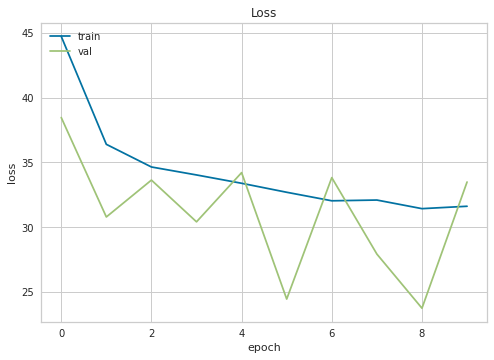

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

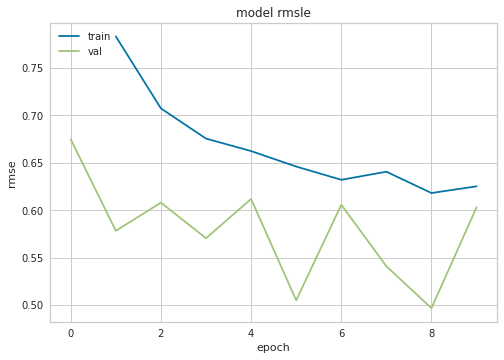

In [25]:
plt.plot(history.history['root_mean_squared_log_error_K'])
plt.plot(history.history['val_root_mean_squared_log_error_K'])
plt.title('model rmsle')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Trying out pycaret

In [28]:
reg1 = setup(data = final_train, target = 'target' , preprocess = False,
            use_gpu = True , test_data = final_cv , session_id = 42)
best = compare_models(sort = 'RMSLE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17.3940,629.2258,25.0559,0.0665,0.5620,0.1808,2.2750
rf,Random Forest Regressor,18.2435,662.4963,25.7163,0.0161,0.5631,0.1914,3.7050
et,Extra Trees Regressor,18.9315,702.4272,26.4792,-0.0432,0.5658,0.1990,3.2690
ada,AdaBoost Regressor,18.1141,638.6553,25.2494,0.0515,0.5666,0.1948,2.5910
huber,Huber Regressor,17.8835,672.2078,25.8992,0.0025,0.5685,0.1809,0.7350
ridge,Ridge Regression,18.1668,705.5276,26.4311,-0.0397,0.5717,0.1894,0.1390
lr,Linear Regression,18.2032,739.4069,26.9299,-0.0844,0.5718,0.1897,0.1340
knn,K Neighbors Regressor,19.6450,737.1239,27.1275,-0.0955,0.5719,0.2069,0.4030
omp,Orthogonal Matching Pursuit,18.0611,659.5578,25.6549,0.0213,0.5719,0.1888,0.1110
br,Bayesian Ridge,18.0721,659.8239,25.6602,0.0209,0.5722,0.1889,0.1970


In [30]:
best_model = tune_model(best ,optimize = 'RMSLE',n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18.0613,670.9291,25.9023,0.0612,0.5408,0.1796
1,17.7008,665.3719,25.7948,0.0667,0.6931,0.1707
2,17.7230,655.0110,25.5932,0.0788,0.5696,0.1886
3,18.1568,667.0778,25.8278,0.0364,0.4738,0.1875
4,16.8758,584.3746,24.1738,0.0687,0.5039,0.2052
5,18.4733,702.6623,26.5078,0.0875,0.6581,0.1796
6,16.0694,535.4844,23.1405,0.0673,0.4884,0.1706
7,16.8293,576.1099,24.0023,0.0737,0.5913,0.1669
8,16.5546,551.8491,23.4915,0.0557,0.4720,0.1842
9,18.1687,694.9635,26.3622,0.0514,0.6245,0.1826


In [31]:
best_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0002, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=0.65, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
grb_submission = pd.DataFrame({"LAP_TIME" :best_model.predict(final_test)})
grb_submission.to_csv("grb.csv",index=False)

## Stacking top 5 models : Giving complexity a swing

In [ ]:
# top5 = compare_models(n_select = 5 , optimize = 'RMSLE', meta_model = 'gbr')
# stacker = stack_models(top5)
gbr = create_model(estimator = 'gbr')
rf = create_model(estimator = 'rf')
et = create_model(estimator = 'et')
ada = create_model(estimator = 'ada')
huber = create_model(estimator = 'huber')

In [38]:
top3 = compare_models(n_select = 3 , sort= 'RMSLE')
stacker = stack_models(top3 , optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18.0357,668.2193,25.8499,0.0650,0.5406,0.1787
1,17.6287,663.6857,25.7621,0.0690,0.6944,0.1703
2,18.0902,734.2222,27.0965,-0.0326,0.5694,0.1924
3,18.1542,671.6670,25.9165,0.0298,0.4762,0.1870
4,16.8847,592.7805,24.3471,0.0553,0.5076,0.2056
5,19.3510,1536.9250,39.2036,-0.9958,0.6613,0.1848
6,16.0816,537.8599,23.1918,0.0631,0.4901,0.1708
7,16.7599,575.9470,23.9989,0.0740,0.5930,0.1655
8,16.5437,559.3730,23.6511,0.0428,0.4743,0.1840
9,18.1408,687.4849,26.2199,0.0616,0.6248,0.1821


In [40]:
stacker.estimators

[('gbr',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=42, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0, warm_start=False)),
 ('rf',
  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
       

In [41]:
grb_submission = pd.DataFrame({"LAP_TIME" :stacker.predict(final_test)})
grb_submission.to_csv("stacker.csv",index=False)